In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('../Dataset/Mobile-Price-Prediction-cleaned_data.csv')

In [3]:
df

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999
...,...,...,...,...,...,...,...,...
802,3.8,6.0,32.0,4.54,48,12.0,2800,1299
803,4.1,8.0,64.0,4.54,64,8.0,2500,1390
804,4.4,3.0,32.0,6.20,48,1.0,3800,9790
805,3.7,10.0,32.0,4.50,64,8.0,3500,799


In [4]:
df.describe()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,4.112639,5.941760,64.390335,5.620660,47.821561,8.868649,3278.859975,14269.167286
std,0.367830,2.056359,53.868626,3.957409,11.155916,4.547254,937.628801,23092.739983
min,2.800000,0.000000,2.000000,2.000000,5.000000,0.000000,1020.000000,479.000000
25%,3.900000,6.000000,32.000000,4.500000,48.000000,8.000000,3000.000000,984.000000
50%,4.100000,6.000000,32.000000,4.770000,48.000000,8.000000,3000.000000,1699.000000
75%,4.400000,6.000000,64.000000,6.300000,48.000000,12.000000,3800.000000,18994.500000
max,4.800000,12.000000,256.000000,44.000000,64.000000,23.000000,6000.000000,153000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        807 non-null    float64
 1   RAM            807 non-null    float64
 2   ROM            807 non-null    float64
 3   Mobile_Size    807 non-null    float64
 4   Primary_Cam    807 non-null    int64  
 5   Selfi_Cam      807 non-null    float64
 6   Battery_Power  807 non-null    int64  
 7   Price          807 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 50.6 KB


In [6]:
df.isnull().sum()

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

In [7]:
df.drop_duplicates()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999
...,...,...,...,...,...,...,...,...
781,4.1,8.0,64.0,4.54,64,8.0,2500,1390
795,3.8,4.0,64.0,4.54,48,15.0,1200,3580
796,4.1,4.0,40.0,4.77,48,15.0,3000,1080
802,3.8,6.0,32.0,4.54,48,12.0,2800,1299


<AxesSubplot: >

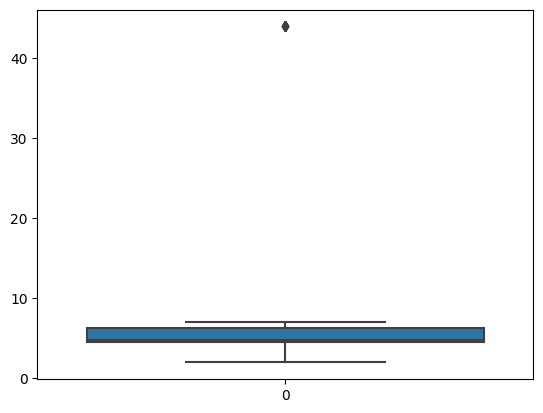

In [8]:
sns.boxplot(df['Mobile_Size'])

<AxesSubplot: >

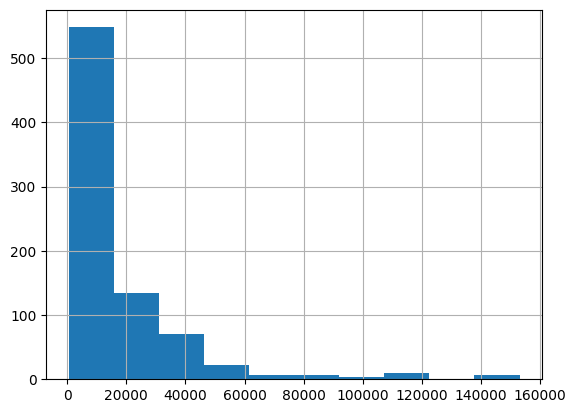

In [9]:
df['Price'].hist()

<AxesSubplot: ylabel='Price'>

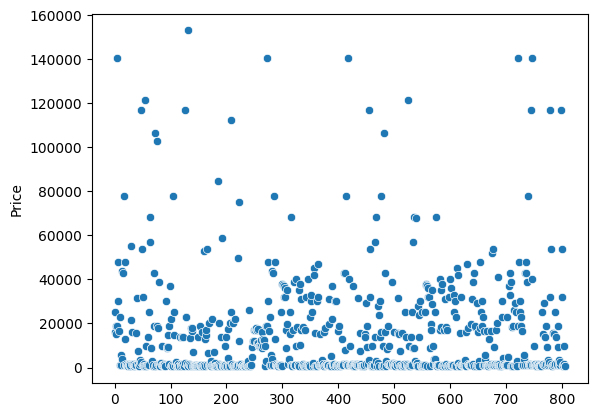

In [10]:
sns.scatterplot(df['Price'])

<AxesSubplot: >

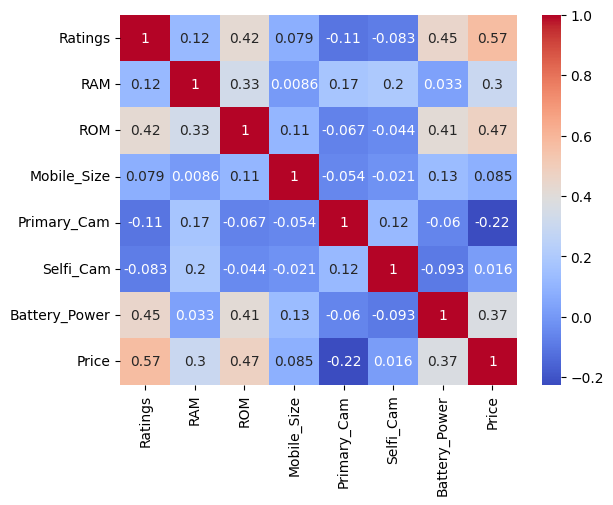

In [11]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


<AxesSubplot: >

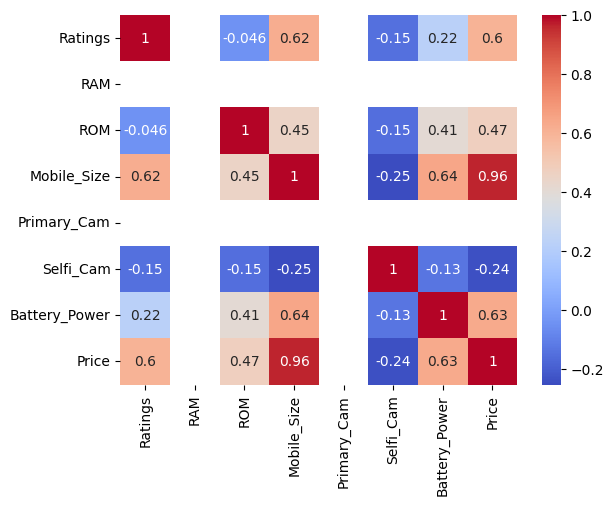

In [13]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['RAM'] = scaler.fit_transform(df[['RAM']])

C:\Users\91858\AppData\Local\Temp\ipykernel_6896\1079687922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RAM'] = scaler.fit_transform(df[['RAM']])


In [15]:
from sklearn.model_selection import train_test_split
x=df.drop('Price',axis=1)
y=df['Price']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
model=LinearRegression()

In [19]:
model.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred=model.predict(X_test)

In [21]:
print('r2score',r2_score(y_test,y_pred))

r2score 0.9522712112999933
